# Institute Of Data Mini Project 1: By Chris Noel Manlunas
Dataset: Nutritional Facts for most common foods

Installing all the necessary Python Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline
import warnings # supress warnings
warnings.filterwarnings('ignore')

Installing OpenML and Request:

In [2]:
!pip install requests
!pip install openml

Creating secure connection to an API(Making sure we are using the right settings):

In [3]:
import requests
import json #just in case it is a jason file.
import openml as oml
oml.config.server = 'https://www.openml.org/api/v1/xml' 
oml.config.apikey = 'ebcbc2fd5d5e130f12cff619cdb81172'

Accessing the Dataset:

In [4]:
dataset = oml.datasets.get_dataset(43423)

print(dataset.description)
print(dataset)

Context
Everybody nowadays is mindful of what they eat. Counting calories and reducing fat intake is the number one advice given by all dieticians and nutritionists. Therefore, we need to know what foods are rich in what nutrients, don't we?
Content
The dataset contains a csv file with more than 300 foods each with the amount of Calories, Fats, Proteins, Saturated Fats, Carbohydrates, Fibers labelled for each food. Also, the foods are also categorised into various groups like Desserts, Vegetables, Fruits etc.
Note: "t" indicates that only a trace amount is available(miniscule) 
Acknowledgements
References: 

Food Nutrient List from Wikipedia
OpenML Dataset
Name..........: Nutritional-Facts-for-most-common-foods
Version.......: 1
Format........: arff
Upload Date...: 2022-03-23 13:15:36
Licence.......: CC0: Public Domain
Download URL..: https://api.openml.org/data/v1/download/22102248/Nutritional-Facts-for-most-common-foods.arff
OpenML URL....: https://www.openml.org/d/43423
# of feature

In [5]:
npdata = dataset.get_data()
my_array = np.array(npdata, dtype=object)
my_array

array([                      Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
       0               Cows' milk   1 qt.    976      660      32  40      36     0
       1                Milk skim   1 qt.    984      360      36   t       t     0
       2               Buttermilk   1 cup    246      127       9   5       4     0
       3    Evaporated, undiluted   1 cup    252      345      16  20      18     0
       4           Fortified milk  6 cups  1,419    1,373      89  42      23   1.4
       ..                     ...     ...    ...      ...     ...  ..     ...   ...
       330    Fruit-flavored soda  12 oz.    346      161       0   0       0     0
       331             Ginger ale  12 oz.    346      105       0   0       0     0
       332              Root beer  12 oz.    346      140       0   0       0     0
       333                 Coffee   1 cup    230        3       t   0       0     0
       334                    Tea   1 cup    230        4       0   t    

Explore Data(Performing EDA on this dataset):
Converted the arff type of data into a Dataframe after getting the data via API.
First and last 5 rows of the data are being displayed. 

In [6]:
df = dataset.get_data(target=dataset.default_target_attribute)[0]
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [7]:
# Just to inspect a category, filtering the rows where Food Category is Dairy products:
Dairy_products = df[df['Category'].str.contains('Dairy products')]
Dairy_products

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,t,t,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,t,t,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


In [8]:
df.replace('t', 0, inplace = True)

In [9]:
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [10]:
#Identifying the dirty values in the Dataframe:
df[df["Calories"]=='1,373']
df[df["Calories"]=="8-44"]
df[df["Calories"]=="1,225"]
df[df["Calories"]=='2.30']

#cleaning specific values in the dirty dataframe in order to convert specific columns and their respective value types into integers. 
df2 = df.replace({'Grams':{'1,419':1419}, 'Calories':{'1,373':1373, '8-44': 26, "1,225": 1225, '1,100': 1100, '2.30': 2}})

In [11]:
df3 = df2.head(12)
df3

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,0,0,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,0,0,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


In [12]:
#Converting the datatypes of chosen columns to be plotted, from "object" datatypes into "integer" data types.
df3["Grams"] = df3["Grams"].astype("int64")
df3["Calories"] = df3["Calories"].astype("int64")
df3["Protein"] = df3["Protein"].astype("int64")
df3["Fat"] = df3["Fat"].astype("int64")
df3["Sat.Fat"] = df3["Sat.Fat"].astype("int64")
df3["Fiber"] = df3["Fiber"].astype("float64")
df3["Carbs"] = df3["Carbs"].astype("int64")

In [13]:
#Creating a new dataframe with the right data types to be plotted:
df_sample_for_plot = df3
df_sample_for_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      12 non-null     object 
 1   Measure   12 non-null     object 
 2   Grams     12 non-null     int64  
 3   Calories  12 non-null     int64  
 4   Protein   12 non-null     int64  
 5   Fat       12 non-null     int64  
 6   Sat.Fat   12 non-null     int64  
 7   Fiber     12 non-null     float64
 8   Carbs     12 non-null     int64  
 9   Category  12 non-null     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ KB


In [14]:
df_sample_for_plot

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0.0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0.0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,0,0,0.0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,0,0,1.0,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0.0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0.0,70,Dairy products


In [15]:
print(df_sample_for_plot.isnull().sum())

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Category    0
dtype: int64


In [16]:
df_sample_for_plot['Calories'].value_counts().head()                             

290    2
660    1
360    1
127    1
345    1
Name: Calories, dtype: int64

In [17]:
calories = df_sample_for_plot.sort_values(by='Calories',ascending=False)
calories.head(10)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0.0,70,Dairy products
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0.0,39,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0.0,24,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,0,0,0.0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,0,0,1.0,42,Dairy products
10,Cocoa,1 cup,252,235,8,11,10,0.0,26,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0.0,11,Dairy products


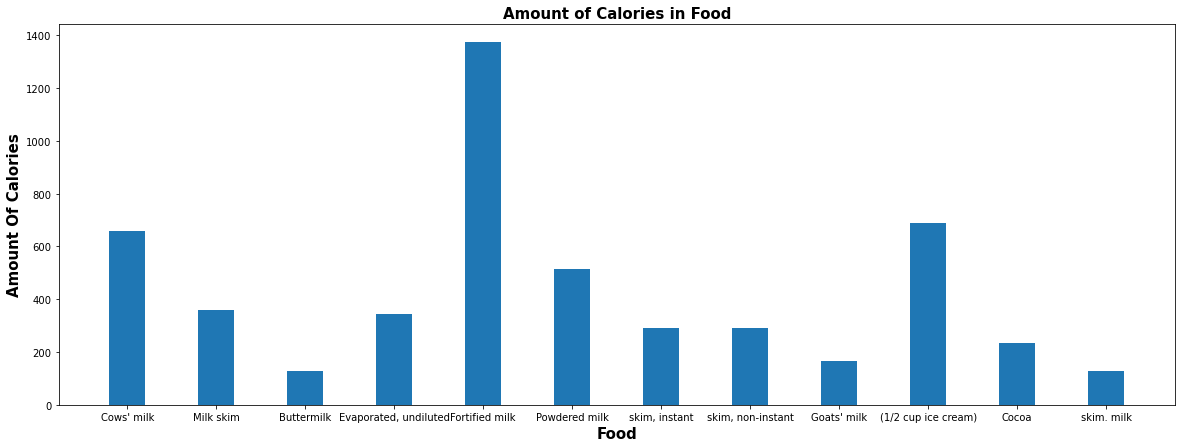

In [18]:
cal = df_sample_for_plot['Calories']
food = df_sample_for_plot['Food']

# Figure Size
fig = plt.figure(figsize =(20, 7))
width = 0.25 

# Horizontal Bar Plot
plt.bar(food, cal, width = 0.4)
plt
plt.title("Amount of Calories in Food", fontweight ='bold', fontsize = 15)
plt.xlabel('Food', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount Of Calories', fontweight ='bold', fontsize = 15)
# Show Plot
plt.show()

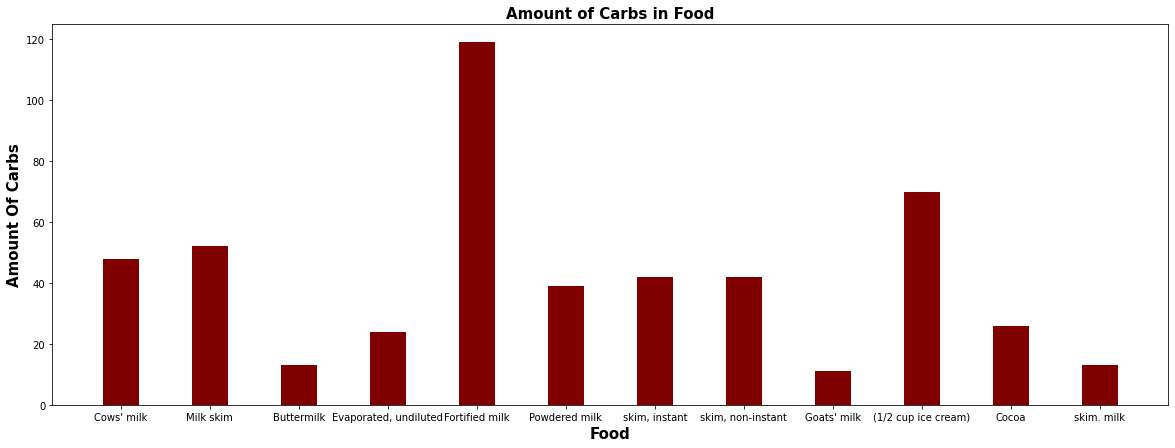

In [19]:
carbo = df_sample_for_plot['Carbs']
food1 = df_sample_for_plot['Food']

fig = plt.figure(figsize =(20, 7))
plt.bar(food1, carbo, color ='maroon', width = 0.4)
plt.xlabel("Food", fontweight ='bold', fontsize = 15)
plt.ylabel("Amount Of Carbs", fontweight ='bold', fontsize = 15)
plt.title("Amount of Carbs in Food", fontweight ='bold', fontsize = 15)
plt.show()

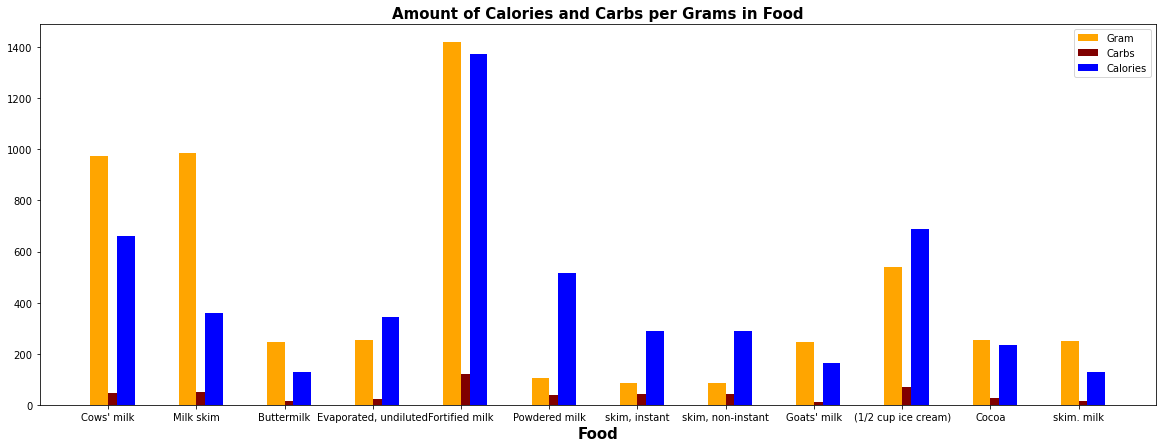

In [20]:
gram = df_sample_for_plot['Grams'].head(12)
food2 = df_sample_for_plot['Food'].head(12)

X_axis = np.arange(len(food2))

fig = plt.figure(figsize =(20, 7))
plt.bar(X_axis - 0.1, gram, color ='orange', width = 0.2, label = "Gram" )
plt.bar(X_axis + 0.1, carbo, color ='maroon', width = 0.2, label = "Carbs" )
plt.bar(X_axis + 0.2, cal, color ='blue', width = 0.2, label = "Calories" )

plt.xticks(X_axis, food2)
plt.xlabel("Food", fontweight ='bold', fontsize = 15)
plt.ylabel
plt.title("Amount of Calories and Carbs per Grams in Food", fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

# Conclusion:
    

According to the sample that I have taken from the "Nutritional-Facts-for-most-common-foods" Dataframe with 10 features, and
335 number of instances, of the first 12 Foods, the Undiluted Fortified Milk appeared to have almost the same amount of
Calories with that of its amount in Grams, but quite low amount of Carbs in proportion of its Calories.
But compared to the rest of the other foods in the list, the Undiluted Fortified Milk appeared to have the most amounts of
both Calories and Carbs.